In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.datasets import make_regression
from sklearn.datasets import fetch_california_housing

## v_0

In [2]:
# Génération d’un dataset de régression
X, y = make_regression(n_samples=1000, n_features=5, noise=10, random_state=42)

In [3]:
# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Entraînement d’un modèle de régression (Régression Linéaire)
reg = LinearRegression()
reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [5]:
# Prédictions
y_pred = reg.predict(X_test)

In [6]:
# Calcul des métriques
print("Mean Absolute Error (MAE) :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) :", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score :", r2_score(y_test, y_pred))


Mean Absolute Error (MAE) : 8.535103887971964
Mean Squared Error (MSE) : 110.90609683464685
Root Mean Squared Error (RMSE) : 10.531196362932697
R² Score : 0.9710547889268921


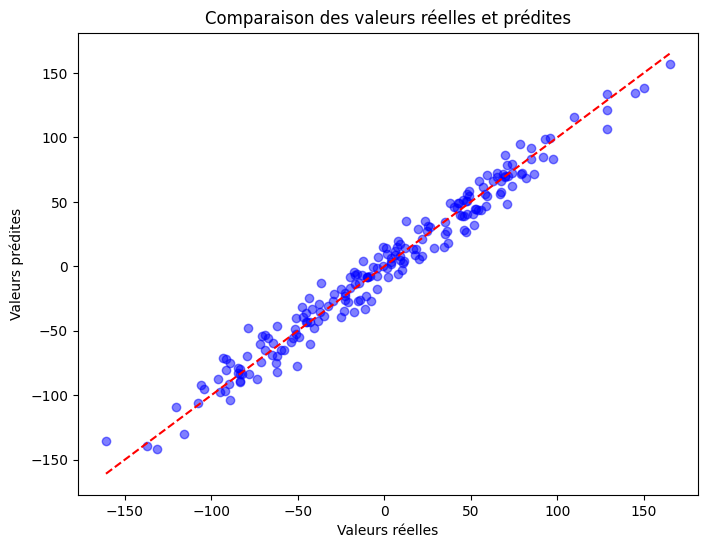

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ligne parfaite
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison des valeurs réelles et prédites")
plt.show()

## v_1

In [8]:
# 1. Charger le dataset California Housing
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

In [9]:
# 2. Choix d'une seule feature (pour visualisation 2D)
feature_idx = feature_names.index("AveRooms")  # exemple : nombre moyen de pièces
X_single_feature = X[:, feature_idx].reshape(-1, 1)

In [10]:
# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size=0.3, random_state=42)

In [11]:
# 4. Standardisation (obligatoire pour SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

In [12]:
# 5. Modèle SVR (avec RBF kernel pour non-linéarité)
model1 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model1.fit(X_train_scaled, y_train_scaled)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",0.1
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",100
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [13]:
# 5. Modele Linear Regression (pour comparaison)
model2 = LinearRegression()
model2.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
# 6. Prédictions
y_pred_scaled1 = model1.predict(X_test_scaled)
y_pred1 = scaler_y.inverse_transform(y_pred_scaled1.reshape(-1, 1)).ravel()

# 6. Prédictions 2
y_pred_scaled2 = model2.predict(X_test_scaled)
y_pred2 = scaler_y.inverse_transform(y_pred_scaled2.reshape(-1, 1)).ravel()

In [15]:
# 7. Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_test, y_pred1)
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Root Mean Squared Error: 1.064
R² Score: 0.137


In [16]:
# 7. Évaluation
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print(f"Root Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

Root Mean Squared Error: 5.072
R² Score: -2.864


In [22]:
# 7 bis - comparaison rmse et valeurs du y
pd.DataFrame({"y": y}).describe()


,y
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


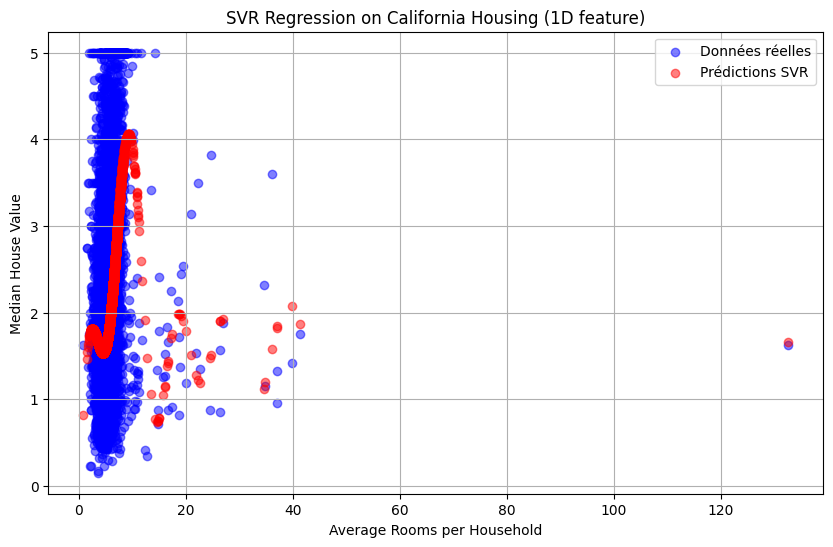

In [16]:
# 8. Visualisation : Données + prédiction
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Données réelles')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Prédictions SVR')
plt.xlabel("Average Rooms per Household")
plt.ylabel("Median House Value")
plt.title("SVR Regression on California Housing (1D feature)")
plt.legend()
plt.grid(True)
plt.show()

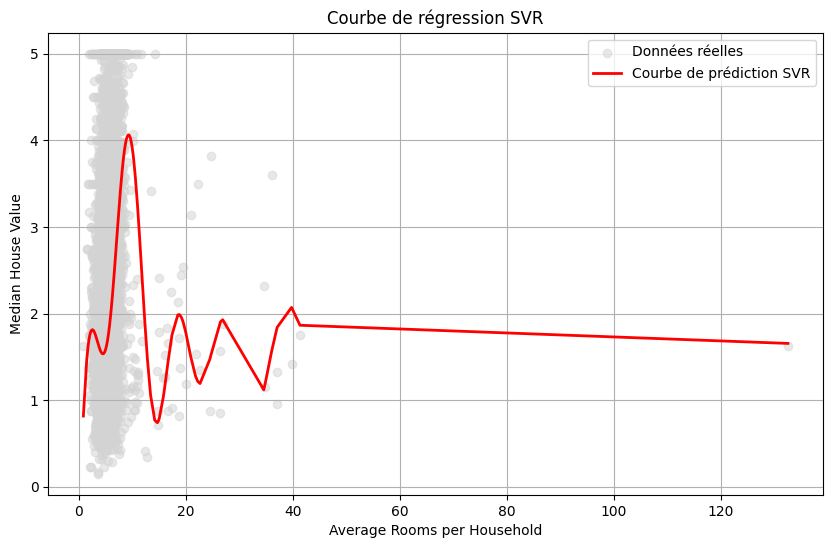

In [ ]:
# 9. Courbe de régression lissée
X_sorted = np.sort(X_test, axis=0)
X_sorted_scaled = scaler_X.transform(X_sorted)
y_sorted_pred_scaled = model.predict(X_sorted_scaled)
y_sorted_pred = scaler_y.inverse_transform(y_sorted_pred_scaled.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='lightgray', alpha=0.5, label='Données réelles')
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Courbe de prédiction SVR')
plt.xlabel("Average Rooms per Household")
plt.ylabel("Median House Value")
plt.title("Courbe de régression SVR")
plt.legend()
plt.grid(True)

plt.show()